### Packages

In [58]:
import MetaTrader5 as mt
from datetime import datetime
import pandas as pd
import plotly.express as px
import time

### Credits

In [2]:
mt.initialize()

True

In [3]:
login = 510674277
password = '!N24Tvf5Dv'
server = 'FxPro-MT5'

In [4]:
mt.login(login,password,server)

True

In [30]:
account_info = mt.account_info()
account_info

AccountInfo(login=510674277, trade_mode=0, leverage=100, limit_orders=70, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=100000.0, credit=0.0, profit=-0.1, equity=99999.9, margin=32.21, margin_free=99967.69, margin_level=310462.2787954051, margin_so_call=60.0, margin_so_so=50.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Bora Simsek', server='FxPro-MT5', currency='USD', company='FXPRO Financial Services Ltd')

In [31]:
symbol_num = mt.symbols_total()
symbol_num

2130

In [32]:
symbol_info = mt.symbols_get()
symbol_info

(SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=75000, volumehigh=5400000, volumelow=18000, time=1712827759, digits=5, spread=12, spread_float=True, ticks_bookdepth=32, trade_calc_mode=0, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=1, trade_freeze_level=0, trade_exemode=2, swap_mode=1, swap_rollover3days=3, margin_hedged_use_leg=True, expiration_mode=15, filling_mode=2, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=1.07376, bidhigh=1.07483, bidlow=1.07351, ask=1.07388, askhigh=1.07495, asklow=1.07363, last=1.07376, lasthigh=1.07483, lastlow=1.07351, volume_real=75000.0, volumehigh_real=5400000.0, volumelow_real=18000.0, option_strike=0.0, point=1e-05, trade_tick_value=1.0, trade_tick_value_profit=1.0, trade_tick_value_loss=1.0, trade_tick_size=1e-05, trade_contract_size=100000.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, v

### PLotting & pd.DataFrame

In [5]:
ticker = 'EURUSD'
interval = mt.TIMEFRAME_D1
from_date = datetime.now()
no_of_rows = 100
rates = mt.copy_rates_from(ticker,interval,from_date,no_of_rows)

In [6]:
rates

array([(1700611200, 1.09101, 1.09222, 1.08517, 1.08876, 537086, 13,  169849143000),
       (1700697600, 1.08876, 1.09303, 1.08819, 1.09017, 366986, 12,   45683620000),
       (1700784000, 1.09017, 1.09479, 1.08944, 1.09412, 437561,  0,   46751830000),
       (1701043200, 1.09426, 1.09586, 1.09245, 1.09529, 523410, 12,   85347393000),
       (1701129600, 1.09529, 1.10084, 1.09339, 1.09919, 527150, 12,   92863529000),
       (1701216000, 1.09919, 1.10166, 1.09596, 1.09684, 567518, 12,   75001096000),
       (1701302400, 1.09684, 1.09834, 1.08786, 1.08853, 562532, 12,   93384070000),
       (1701388800, 1.08853, 1.09122, 1.08282, 1.08784, 568176, 12,  115785563000),
       (1701648000, 1.08738, 1.08941, 1.08035, 1.08352, 592095, 12,  246300231474),
       (1701734400, 1.08352, 1.08468, 1.07776, 1.07956, 563615, 12,   83437516000),
       (1701820800, 1.07956, 1.0804 , 1.07577, 1.07634, 553124, 12,  131228936000),
       (1701907200, 1.07634, 1.08171, 1.07546, 1.07928, 592546, 12,  1141928

In [11]:
ohlc = pd.DataFrame(mt.copy_rates_range('EURUSD',mt.TIMEFRAME_M15,datetime(2024,4,10),datetime.now()))
ohlc['time'] = pd.to_datetime(ohlc['time'],unit = 's')
ohlc

,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-04-09 21:00:00,1.08508,1.08525,1.08495,1.08518,4899,12,367665000
1,2024-04-09 21:15:00,1.08518,1.08541,1.08516,1.08523,4316,12,323850000
2,2024-04-09 21:30:00,1.08523,1.08542,1.08519,1.08521,4637,12,351405000
3,2024-04-09 21:45:00,1.08521,1.08537,1.08505,1.08524,4470,12,335280000
4,2024-04-09 22:00:00,1.08523,1.08523,1.08471,1.08486,4603,12,346155000
...,...,...,...,...,...,...,...,...
128,2024-04-11 05:00:00,1.07455,1.07460,1.07439,1.07447,4109,12,308835000
129,2024-04-11 05:15:00,1.07447,1.07463,1.07447,1.07459,3205,12,241305000
130,2024-04-11 05:30:00,1.07459,1.07460,1.07438,1.07448,3407,12,255705000
131,2024-04-11 05:45:00,1.07448,1.07459,1.07442,1.07450,3458,12,259350000


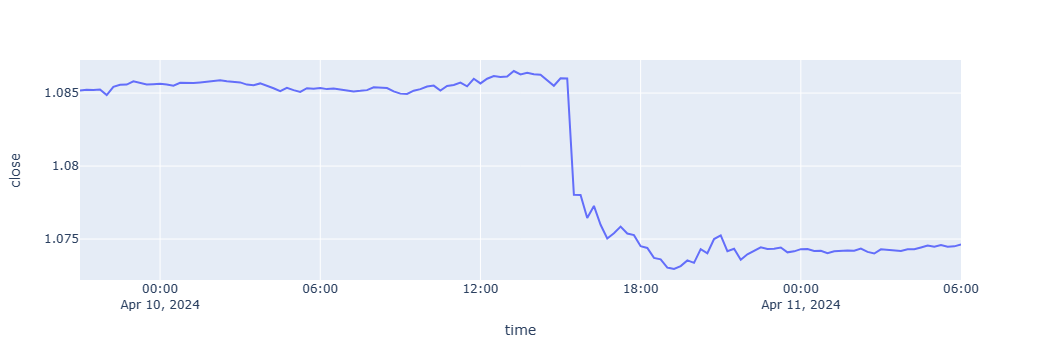

In [12]:
fig = px.line(ohlc, x = ohlc['time'], y = ohlc['close'])
fig.show()

### Sending Orders

In [28]:
# WE buy it at a ask price, we sell it in bid price.
# Be Careful at the sl values
symbol = 'EURUSD'
volume = 0.01
request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": volume,
    "type": mt.ORDER_TYPE_BUY,
    "price": mt.symbol_info_tick(symbol).ask,
    "sl": 0.9,
    "tp":1.5,
    "comment": 'Python Script buy trial',
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling":mt.ORDER_FILLING_IOC
    
}
result = mt.order_send(request)

In [29]:
result

OrderSendResult(retcode=10009, deal=86168346, order=103904062, volume=0.01, price=1.07376, bid=0.0, ask=0.0, comment='Request executed', request_id=3430490256, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.07376, stoplimit=0.0, sl=0.9, tp=1.5, deviation=0, type=0, type_filling=1, type_time=0, expiration=0, comment='Python Script buy trial', position=0, position_by=0))

In [35]:
request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": volume,
    "type": mt.ORDER_TYPE_SELL,
    "position": 103904056,
    "price": mt.symbol_info_tick(symbol).bid,
    "comment": 'Close',
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling":mt.ORDER_FILLING_IOC
    
}
order = mt.order_send(request)
print(order)

OrderSendResult(retcode=10009, deal=86169394, order=103905147, volume=0.01, price=1.07362, bid=0.0, ask=0.0, comment='Request executed', request_id=3430490258, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.07362, stoplimit=0.0, sl=0.0, tp=0.0, deviation=0, type=1, type_filling=1, type_time=0, expiration=0, comment='Close', position=103904056, position_by=0))


### Algorithmic Bot 

In [52]:
ticker = 'EURUSD'
qty = 0.01
buy_order_type = mt.ORDER_TYPE_BUY
sell_order_type = mt.ORDER_TYPE_SELL
buy_price = mt.symbol_info_tick(ticker).ask
sell_price = mt.symbol_info_tick(ticker).bid
sl_percent =  0.05
tp_percent = 0.1
buy_sl = buy_price * (1-sl_percent)
buy_tp = buy_price * (1+tp_percent)
sell_sl = buy_price * (1+sl_percent)
sell_tp = buy_price * (1-tp_percent)

def create_order(ticker, qty, order_type,price,sl,tp):
    request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": ticker,
    "volume": qty,
    "type": order_type,
    "price": price,
    "sl": sl,
    "tp":tp,
    "comment": 'Python open position',
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling":mt.ORDER_FILLING_IOC   
    }
    order = mt.order_send(request)
    return order
    
def close_order(ticker, qty, order_type,price):
    request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": ticker,
    "volume": qty,
    "type": order_type,
    "position": mt.positions_get()[0]._asdict()['ticket'],
    "price": price,
    "comment": 'Python close position',
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling":mt.ORDER_FILLING_IOC   
    }
    order = mt.order_send(request)
    return order

In [56]:
create_order(ticker, qty, sell_order_type ,sell_price,sell_sl,sell_tp)

OrderSendResult(retcode=10009, deal=86188408, order=103924524, volume=0.01, price=1.0739, bid=0.0, ask=0.0, comment='Request executed', request_id=3430490268, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.07398, stoplimit=0.0, sl=1.1278050000000002, tp=0.96669, deviation=0, type=1, type_filling=1, type_time=0, expiration=0, comment='Python open position', position=0, position_by=0))

In [57]:
close_order(ticker,qty,buy_order_type,buy_price)

OrderSendResult(retcode=10009, deal=86188414, order=103924530, volume=0.01, price=1.07401, bid=0.0, ask=0.0, comment='Request executed', request_id=3430490269, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.0741, stoplimit=0.0, sl=0.0, tp=0.0, deviation=0, type=0, type_filling=1, type_time=0, expiration=0, comment='Python close position', position=103924524, position_by=0))

In [ ]:
for i in range (100):
    ohlc = pd.DataFrame(mt.copy_rates_range('EURUSD',mt.TIMEFRAME_M1,datetime(2024,4,10),datetime.now()))
    ohlc['time'] = pd.to_datetime(ohlc['time'],unit = 's')
    print(ohlc)
    
    current_close = list(ohlc[-1:]['close'])[0]
    last_close =  list(ohlc[-2:]['close'])[0]
    last_high =  list(ohlc[-2:]['high'])[0]
    last_low =  list(ohlc[-2:]['low'])[0]
    long_condition = current_close > last_high
    short_conditition = current_close < last_low
    closelong_condition = current_close < last_close
    closeshort_condion = current_close > last_close
    
    already_buy = False
    already_sell = False
    
    try : 
        already_sell = mt.positions_get()[0]._asdict()['type']==1
        already_buy = mt.positions_get()[0]._asdict()['type']==0
    except:
        pass
    
    no_positions = len(mt.positions_get()) == 0
    
    
    if long_condition:
        if no_positions:
            create_order(ticker,qty,buy_order_type,buy_price,buy_sl,buy_tp)
            print('Buy order placed')
        if already_sell:
            close_order(ticker,qty,buy_order_type,buy_price)
            print("Sell Position Closed")
            time.sleep(1)
            create_order(ticker,qty,buy_order_type,buy_price,buy_sl,buy_tp)
            print('Buy order placed')
            
            
    if short_conditition:
        if no_positions:
            create_order(ticker,qty,sell_order_type,sell_price,sell_sl,sell_tp)
            print('Sell order placed')
        if already_buy:
            close_order(ticker,qty,sell_order_type,sell_price)
            print("Buy Position Closed")
            time.sleep(1)
            create_order(ticker,qty,sell_order_type,sell_price,sell_sl,sell_tp)
            print('Sell order placed')
    
    try : 
        already_sell = mt.positions_get()[0]._asdict()['type']==1
        already_buy = mt.positions_get()[0]._asdict()['type']==0
    except:
        pass
    
    if closelong_condition and already_buy:
        close_order(ticker,qty,sell_order_type,sell_price)
        print('Only long closed')
    if closeshort_condion and already_sell:
        close_order(ticker,qty,buy_order_type,buy_price)
        print('Only sell closed')
        
    already_buy = False
    already_sell = False
    time.sleep(60)
            

                    time     open     high      low    close  tick_volume  \
0    2024-04-09 21:00:00  1.08508  1.08508  1.08501  1.08504          436   
1    2024-04-09 21:01:00  1.08504  1.08507  1.08500  1.08502          355   
2    2024-04-09 21:02:00  1.08502  1.08502  1.08495  1.08497          321   
3    2024-04-09 21:03:00  1.08497  1.08502  1.08495  1.08496          338   
4    2024-04-09 21:04:00  1.08496  1.08504  1.08496  1.08503          245   
...                  ...      ...      ...      ...      ...          ...   
2241 2024-04-11 10:21:00  1.07423  1.07430  1.07417  1.07425          431   
2242 2024-04-11 10:22:00  1.07424  1.07437  1.07424  1.07435          378   
2243 2024-04-11 10:23:00  1.07435  1.07435  1.07417  1.07426          429   
2244 2024-04-11 10:24:00  1.07426  1.07433  1.07421  1.07427          466   
2245 2024-04-11 10:25:00  1.07427  1.07441  1.07424  1.07436          458   

      spread  real_volume  
0         12     32700000  
1         12     26